# AI PROJECT ON SURFACE AIR TEMPREATURE 


# BUSINESS CASE: BASED ON MEAN TEMPREATURE OF PAST MONTH  WE NEED TO PREDICT THE NEXT MONTH SURFACE AIR TEMPRETURE 

**Surface air temperature is the temperature of the air around us, generally measured at a height of around two meters (about 6 and a half feet) above the surface. Thermometers, shielded from direct solar energy, are used to measure surface air temperature.**


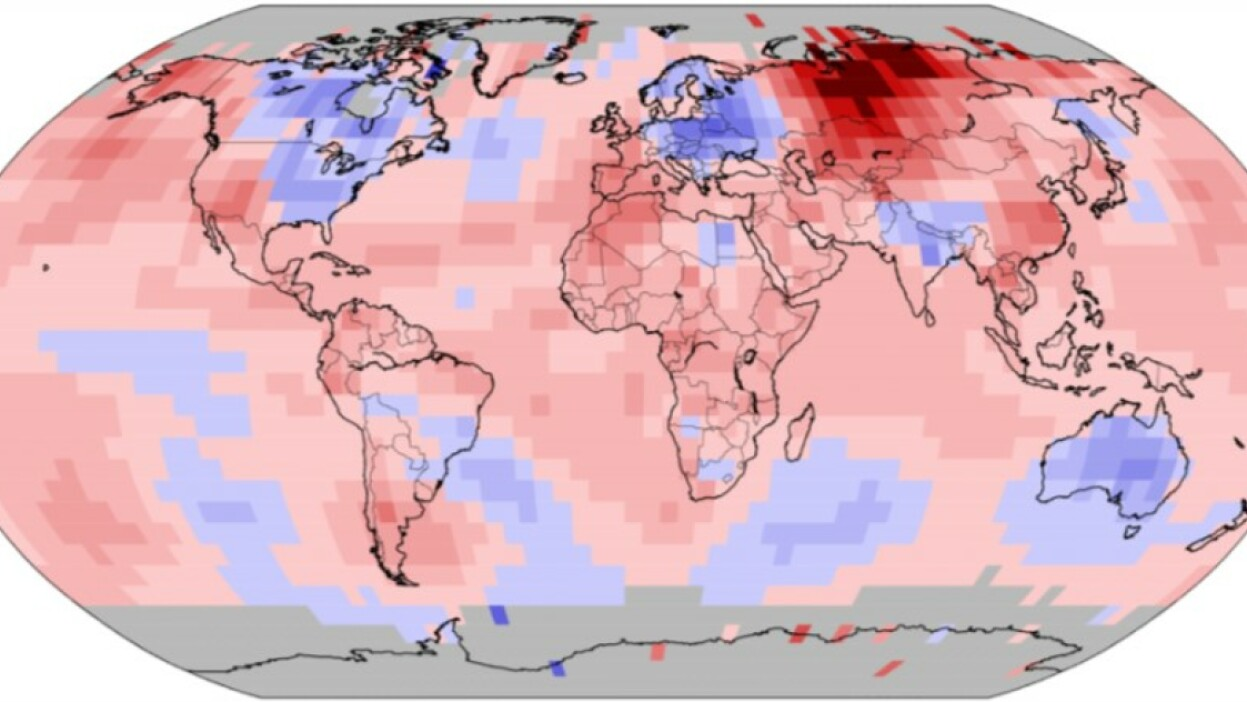

# PYTHON IMPLIMENTATION

In [1]:
# Importing Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To Supress The Warnings
import warnings
warnings.filterwarnings('ignore')

# READ DATASET

In [2]:
data = pd.read_csv("surface-air-temperature-monthly-mean.csv",index_col='month',parse_dates=True)

""" Use index_col to set column as a index 
parse_date= True to make sure pandas recognize the data in time series format and does not treated the string """

data.index.freq='MS'  # Dealing with monthly data

data.head()

,mean_temp
month,
1982-01-01,25.9
1982-02-01,27.1
1982-03-01,27.2
1982-04-01,27.0
1982-05-01,28.0


## BASIC OF DATA

In [3]:
# Last 5 observation
data.tail()

,mean_temp
month,
2020-02-01,27.9
2020-03-01,28.6
2020-04-01,28.9
2020-05-01,28.9
2020-06-01,28.1


In [4]:
# Shape of data
data.shape

(462, 1)

* Dataset contain Total 462 Observation with 1 feature

In [5]:
# Columns of data
data.columns

Index(['mean_temp'], dtype='object')

In [6]:
# Examin the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 462 entries, 1982-01-01 to 2020-06-01
Freq: MS
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mean_temp  462 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [7]:
# Statistical measures of data
data.describe()

,mean_temp
count,462.000000
mean,27.665152
std,0.808186
min,25.400000
25%,27.100000
50%,27.700000
75%,28.300000
max,29.500000


## VISUALISE THE TREND

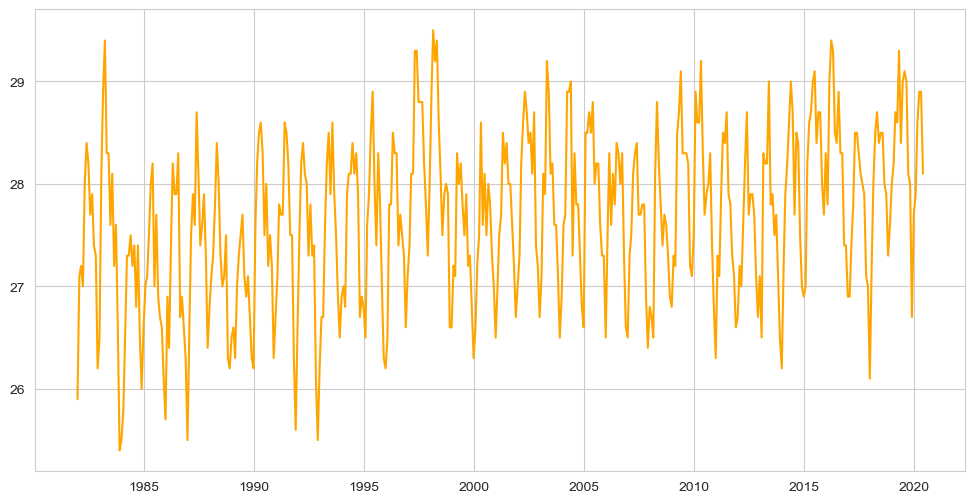

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.plot(data,color='orange')
plt.show()

### Observation: 
* The Data is shows the strong Seasonality.

**Visualise the different componants like seasonal nature, trend for that we are use stats model**

In [9]:
# Importing statsmodel 
from statsmodels.tsa.seasonal import seasonal_decompose  # Decompose Different parts of time series

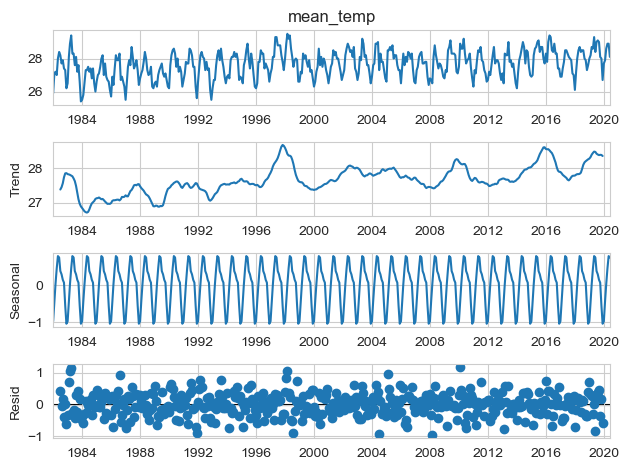

In [10]:
result = seasonal_decompose(data['mean_temp'])
result.plot();

### Observation:
- In The Year of 1996 to 1998 surface air temperature has been suddenly increases.
- In 2014 to 2016 also surface temperature is high
- In This we can clearly see the seasonal pattern in data
- In Residule we can not explain the seasonal pattern and trend because of noise data.


# SPLIT DATA INTO TRAIN & TEST

In [11]:
# Getting the length of data
len(data)

462

In [12]:
# Taking last 12 month for testing and remaining data for training
train = data.iloc[:450]  
test = data.iloc[450:] 

# SCALE DATA
* Scale the data using Min-Max scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Object Creation
scaler = MinMaxScaler()


In [14]:
data.head(),data.tail()

(            mean_temp
 month                
 1982-01-01       25.9
 1982-02-01       27.1
 1982-03-01       27.2
 1982-04-01       27.0
 1982-05-01       28.0,
             mean_temp
 month                
 2020-02-01       27.9
 2020-03-01       28.6
 2020-04-01       28.9
 2020-05-01       28.9
 2020-06-01       28.1)

In [15]:
# Fitting The training data
scaler.fit(train)

# transform train & Test data
scaled_train = scaler.transform(train)
scaled_test  = scaler.transform(test)

In [16]:
# First 10 scaled values
scaled_train[:10]

array([[0.12195122],
       [0.41463415],
       [0.43902439],
       [0.3902439 ],
       [0.63414634],
       [0.73170732],
       [0.68292683],
       [0.56097561],
       [0.6097561 ],
       [0.48780488]])

In [17]:
# Creating a batches with the help of timeseries generator
from keras.preprocessing.sequence import TimeseriesGenerator

# Define Generator
n_input = 3  # Use 3 values at a time
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [18]:
# Let see How generator are converted the data
X,y = generator[0] 
print(f"Given The Array: {X.flatten()}")
print(f"Prediction {y}")

Given The Array: [0.12195122 0.41463415 0.43902439]
Prediction [[0.3902439]]


In [19]:
# Checking the shape
X.shape

(1, 3, 1)

# MODEL CREATION

In [20]:
# Import necessary library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [21]:
# Now we are do same thing but insted of 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,scaled_train, length=n_input, batch_size=1)

In [22]:
# Define model & Create model object
model = Sequential() # Create sequential model [add layers after layer]

# Add lstm layer with 100 neuron and the activation function is relu
model.add(LSTM(100,activation='relu',input_shape =(n_input,n_features)))  

# Add output layer
model.add(Dense(1))

# Getting the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


## COMPILE MODEL

In [23]:
model.compile(optimizer='adam',loss='mse')

## TRAIN MODEL

In [24]:
history = model.fit(generator,epochs=100)

Epoch 1/100
438/438 [==============================] - 3s 4ms/step - loss: 0.0409
Epoch 2/100
438/438 [==============================] - 1s 3ms/step - loss: 0.0246
Epoch 3/100
438/438 [==============================] - 1s 3ms/step - loss: 0.0205
Epoch 4/100
438/438 [==============================] - 1s 3ms/step - loss: 0.0173
Epoch 5/100
438/438 [==============================] - 1s 3ms/step - loss: 0.0161
Epoch 6/100
438/438 [==============================] - 2s 4ms/step - loss: 0.0168
Epoch 7/100
438/438 [==============================] - 2s 4ms/step - loss: 0.0157
Epoch 8/100
438/438 [==============================] - 1s 3ms/step - loss: 0.0157
Epoch 9/100
438/438 [==============================] - 1s 3ms/step - loss: 0.0159
Epoch 10/100
438/438 [==============================] - 1s 3ms/step - loss: 0.0145
Epoch 11/100
438/438 [==============================] - 1s 3ms/step - loss: 0.0146
Epoch 12/100
438/438 [==============================] - 1s 3ms/step - loss: 0.0148
Epoch 13/100


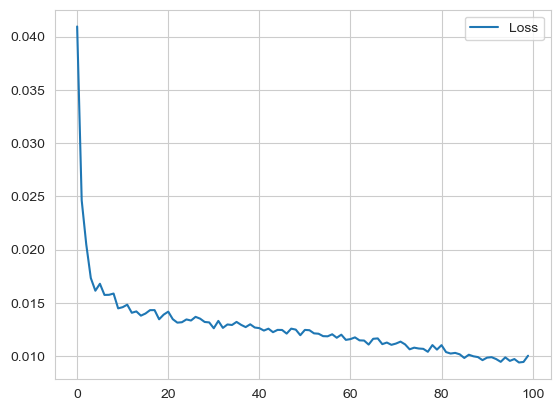

In [25]:
# Plotting the loss
plt.plot(history.history['loss'],label='Loss')
plt.legend()
plt.savefig("Loss")
plt.show()

In [26]:
# save model
model.save('air_tempreture.h5')

# PREDICTIONS

In [27]:
# Take last 12 months values to make a prediction of first value of test set
last_train_batch = scaled_train[-12:]

# Reshape the data
last_train_batch = last_train_batch.reshape(1,n_input,n_features)

# Cehcking the shape
last_train_batch.shape

(1, 12, 1)

In [28]:
# Making Prediction
model.predict(last_train_batch)

1/1 [==============================] - 0s 192ms/step


array([[0.70481455]], dtype=float32)

In [29]:
scaled_test[0]  # Actual first value

array([0.87804878])

# PREDICTION ON TESTING SET

In [30]:
# Create empty list
test_prediction = []

first_batch = scaled_train[-n_input:]  # Take last 12 values from training set
current_batch = first_batch.reshape(1, n_input, n_features) # Reshape the first batch

# iterate the testing set
for i in range(len(test)):
    
    # Get Prediction Value for first batch
    current_pred = model.predict(current_batch)[0]
    
    # Append the prediction into the array
    test_prediction.append(current_pred)
    
    # Use prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)


1/1 [==============================] - 0s 16ms/step


In [31]:
test_prediction

[array([0.70481455], dtype=float32),
 array([0.66543436], dtype=float32),
 array([0.6264403], dtype=float32),
 array([0.5811784], dtype=float32),
 array([0.47193503], dtype=float32),
 array([0.40131527], dtype=float32),
 array([0.44137502], dtype=float32),
 array([0.5865485], dtype=float32),
 array([0.69677675], dtype=float32),
 array([0.7661831], dtype=float32),
 array([0.79709214], dtype=float32),
 array([0.766743], dtype=float32)]

* We need to transform the values into original scales

In [32]:
# Transform the values into original form
prediction = scaler.inverse_transform(test_prediction)

test['Prediction'] = prediction

test.head(10)

,mean_temp,Prediction
month,,
2019-07-01,29.0,28.289740
2019-08-01,29.1,28.128281
2019-09-01,29.0,27.968405
2019-10-01,28.1,27.782832
2019-11-01,28.0,27.334934
2019-12-01,26.7,27.045393
2020-01-01,27.7,27.209638
2020-02-01,27.9,27.804849
2020-03-01,28.6,28.256785


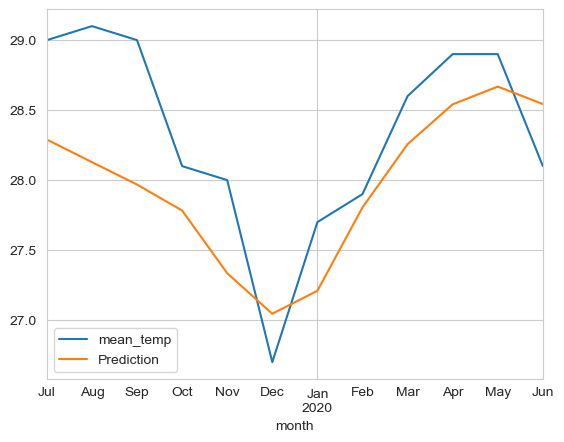

In [33]:
test.plot()
plt.show()

In [34]:
# Checking the root mean square error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['mean_temp'],test['Prediction']))
print(rmse*100)

57.166758901736245


------------------------------------------------------------------------------------------THANK YOU-------------------------------------------------------------------------------------------------------